# Used Vehicles Data Analysis
In this notebook, we will go through the exploratory data analysis (EDA) and feature engineering for machine learning model.

## 1. Dataset
The dataset used in this module was downloaded from kaggle: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Read dataset
df = pd.read_csv("../data/raw_vehicles_data.csv")

In [3]:
# Get shape info
print(df.shape)

(426880, 26)


In [4]:
# Visualize the dataset
df.sample(5).T

,351419,145648,8477,207071,361678
id,7303395577,7312602684,7316511912,7302025798,7315085784
url,https://siouxfalls.craigslist.org/ctd/d/sioux-...,https://carbondale.craigslist.org/ctd/d/cape-g...,https://flagstaff.craigslist.org/cto/d/munds-p...,https://monroemi.craigslist.org/ctd/d/monroe-2...,https://tricities.craigslist.org/ctd/d/summerf...
region,sioux falls / SE SD,southern illinois,flagstaff / sedona,monroe,tri-cities
region_url,https://siouxfalls.craigslist.org,https://carbondale.craigslist.org,https://flagstaff.craigslist.org,https://monroemi.craigslist.org,https://tricities.craigslist.org
price,23998,22977,36500,39990,35903
year,2013.0,2013.0,2013.0,2020.0,2012.0
manufacturer,chevrolet,lexus,jeep,acura,ram
model,silverado 1500,gs 350,wrangler unlimited rubicon,mdx sh-awd sport utility,3500 slt
condition,NaN,NaN,like new,good,NaN
cylinders,NaN,6 cylinders,6 cylinders,6 cylinders,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

## 2. Exploratory Data Analysis

The following will be analyzed:
1. The target variable
2. Variables
3. Missing data
4. Drop unused features and feature with missing values > 50%

### 2.1. Target variable

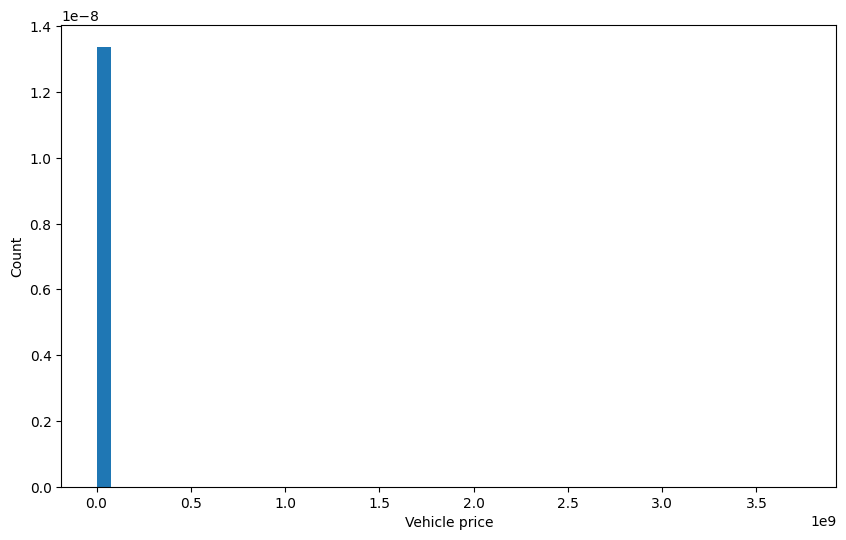

In [6]:
# Histogram to evaluate target distribution
plt.figure(figsize=(10,6))
df["price"].hist(bins=50, density=True)
plt.grid(False)
plt.xlabel("Vehicle price")
plt.ylabel("Count")
plt.show()

In [7]:
# The price data has some outliers, get only 95% of price data to remove outliers
quantile = df["price"].quantile(0.95)
quantile

44500.0

In [8]:
# Get price under 95%
df = df[df["price"] <= quantile]

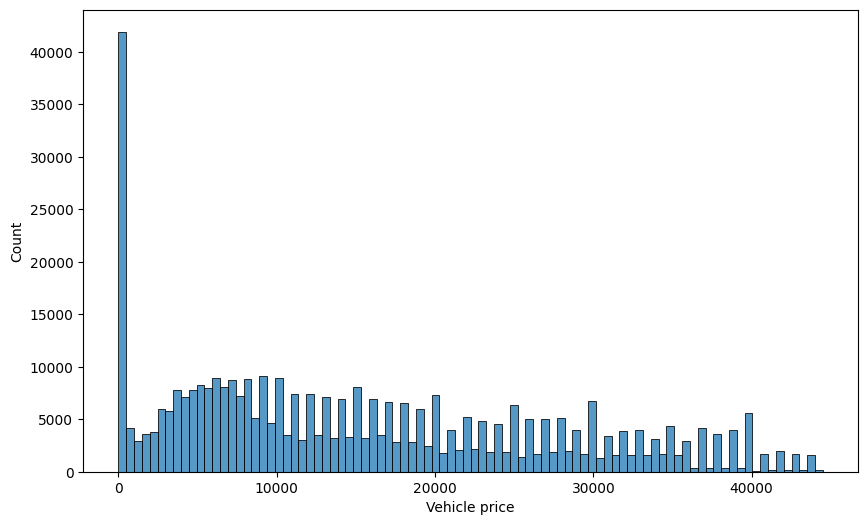

In [9]:
# Plot the target variable again
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="price")
plt.xlabel("Vehicle price")
plt.ylabel("Count")
plt.show()

### 2.2. Variables

In [10]:
# Remove outlier data in odometer
quantile = df["odometer"].quantile(0.95)
df = df[df["odometer"] <= quantile]

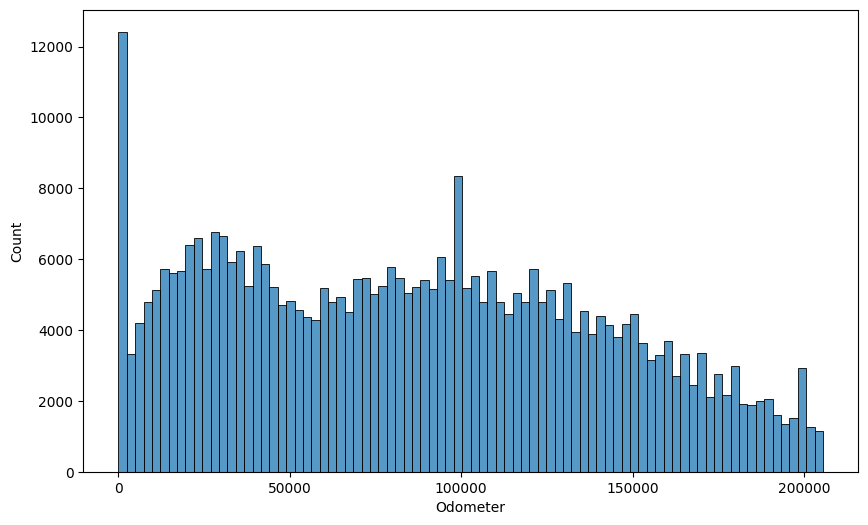

In [11]:
# Plot the odometer variable
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="odometer")
plt.xlabel("Odometer")
plt.ylabel("Count")
plt.show()

In [12]:
# Remove data with year under 1990
df = df[df["year"] >= 1990]
df["year"] = df["year"].astype(int)
print(df["year"].unique())

[2014 2010 2020 2017 2013 2012 2016 2019 2011 1992 2018 2004 2015 2001
 2006 2003 2008 2007 2005 2009 2002 1999 2021 1997 1995 2000 1996 1991
 1994 1998 1993 1990 2022]


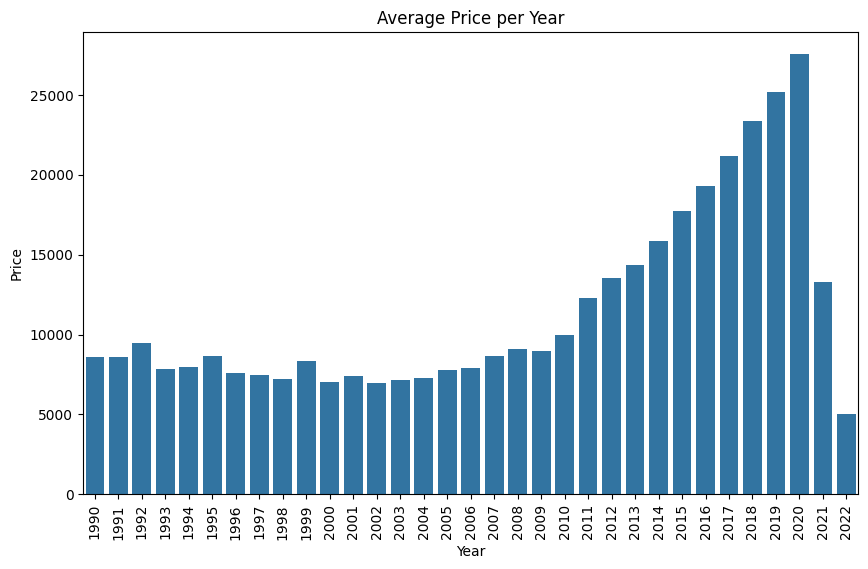

In [13]:
# Plot price throughout the vehicles built year
df_price_mean = df.groupby("year")["price"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=df_price_mean, x="year", y="price")
plt.title("Average Price per Year")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

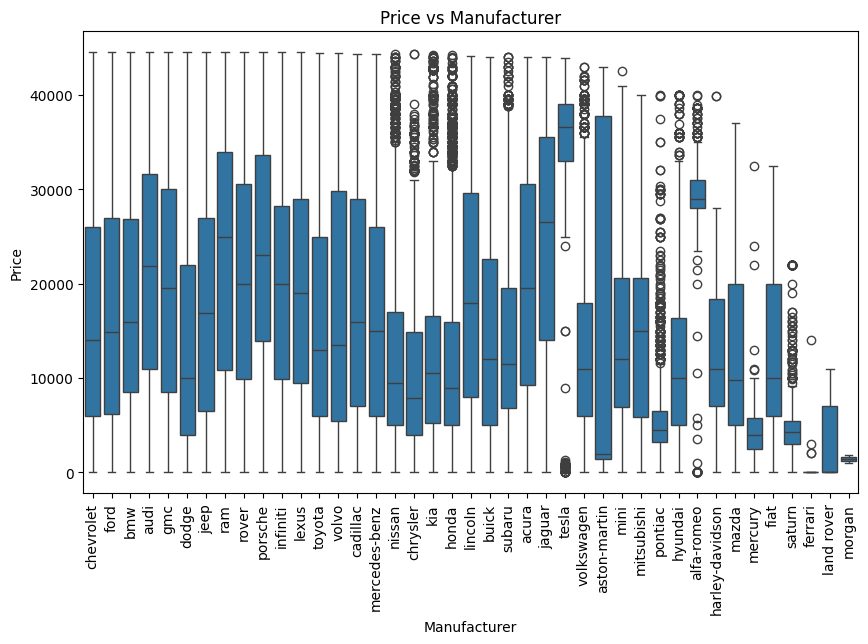

In [14]:
# Manufacturer with price
df_sorted = df.sort_values(by="price",ascending=False)

plt.figure(figsize=(10,6))
sns.boxplot(data=df_sorted, x="manufacturer", y="price")
plt.title("Price vs Manufacturer")
plt.xticks(rotation=90)
plt.xlabel("Manufacturer")
plt.ylabel("Price")
plt.show()

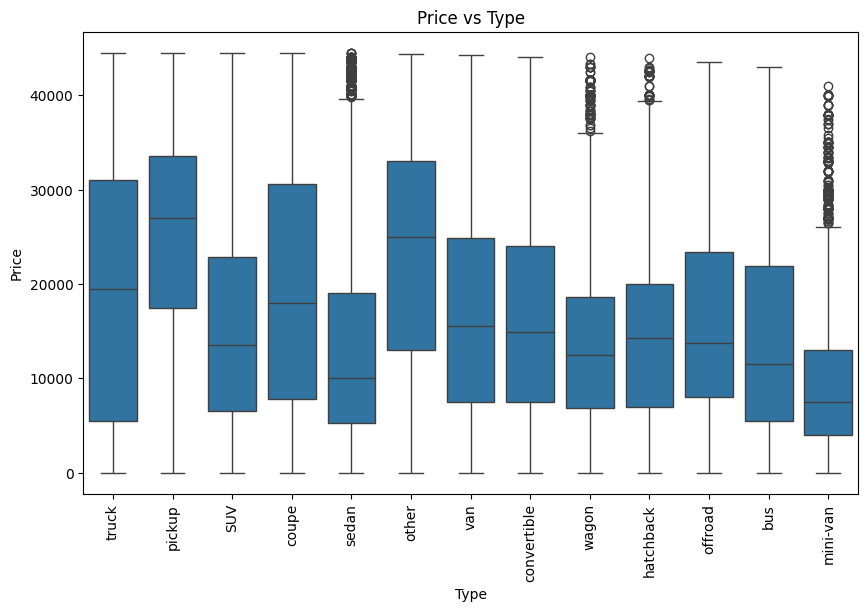

In [15]:
# Type with price
df_sorted = df.sort_values(by="price",ascending=False)

plt.figure(figsize=(10,6))
sns.boxplot(data=df_sorted, x="type", y="price")
plt.title("Price vs Type")
plt.xticks(rotation=90)
plt.xlabel("Type")
plt.ylabel("Price")
plt.show()

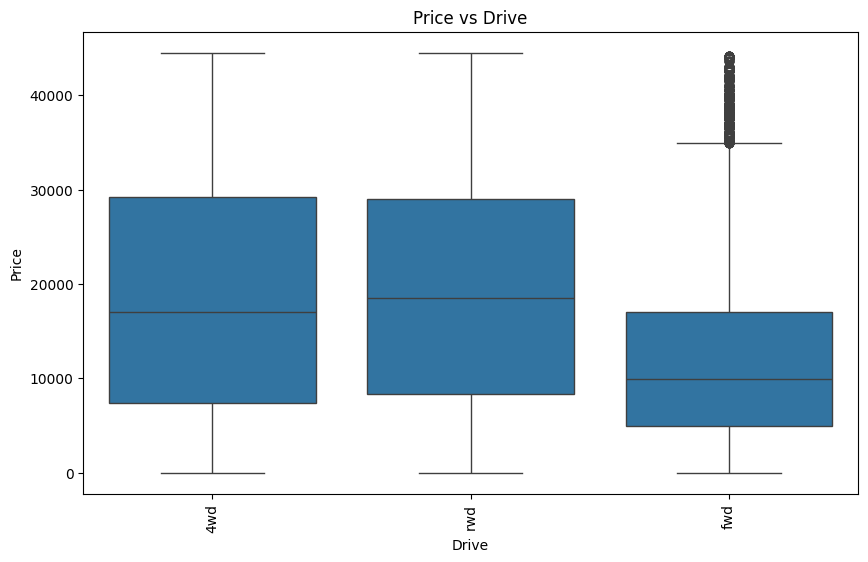

In [16]:
# Drive with price
df_sorted = df.sort_values(by="price",ascending=False)

plt.figure(figsize=(10,6))
sns.boxplot(data=df_sorted, x="drive", y="price")
plt.title("Price vs Drive")
plt.xticks(rotation=90)
plt.xlabel("Drive")
plt.ylabel("Price")
plt.show()

### 2.3. Missing data

In [17]:
# Inspect any missing values
df.isna().mean().sort_values(ascending=False)

county          1.000000
size            0.721077
cylinders       0.418139
condition       0.401038
VIN             0.354589
drive           0.307066
paint_color     0.299347
type            0.205083
manufacturer    0.031093
title_status    0.018433
lat             0.016939
long            0.016939
model           0.008685
fuel            0.005451
transmission    0.003976
description     0.000003
image_url       0.000000
state           0.000000
id              0.000000
url             0.000000
odometer        0.000000
year            0.000000
price           0.000000
region_url      0.000000
region          0.000000
posting_date    0.000000
dtype: float64

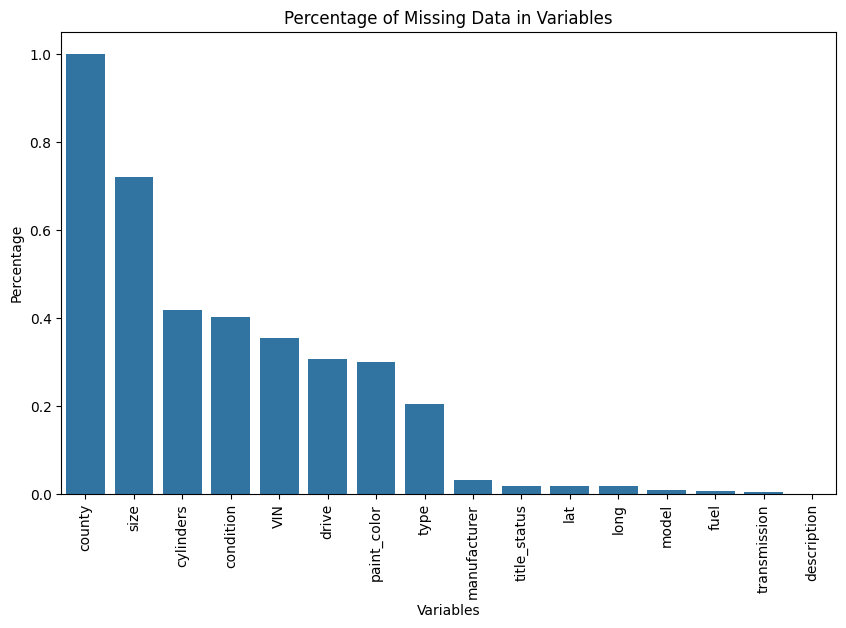

In [18]:
# Plot a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

df_na = df[vars_with_na].isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(df_na)
plt.title("Percentage of Missing Data in Variables")
plt.xlabel("Variables")
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.show()

### 2.4. Drop features

In [19]:
# Drop features that will not affect model and feature with null values > 60%
df.drop(["county", "size", "id", "url", "region_url", "VIN", "image_url", "description"], axis=1, inplace=True)
df.head().T

,27,28,29,30,31
region,auburn,auburn,auburn,auburn,auburn
price,33590,22590,39590,30990,15000
year,2014,2010,2020,2017,2013
manufacturer,gmc,chevrolet,chevrolet,toyota,ford
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt
condition,good,good,good,good,excellent
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders
fuel,gas,gas,gas,gas,gas
odometer,57923.0,71229.0,19160.0,41124.0,128000.0
title_status,clean,clean,clean,clean,clean


## 3. Feature Engineering

There are several steps in feature engineering in this notebook:
1. Add additional columns based on posting_date column
2. Convert strings to categories
3. Handling numerical missing values
4. Handling categorical missing values

### 3.1. Add additional feature columns

In [20]:
# Convering posting_date from string to datetime type
df["posting_date"] = pd.to_datetime(df["posting_date"], utc=True)
df["posting_date"].head()

27   2021-05-04 17:31:18+00:00
28   2021-05-04 17:31:08+00:00
29   2021-05-04 17:31:25+00:00
30   2021-05-04 15:41:31+00:00
31   2021-05-03 19:02:03+00:00
Name: posting_date, dtype: datetime64[ns, UTC]

In [21]:
# Assign new columns
df["posting_year"] = df["posting_date"].dt.year
df["posting_month"] = df["posting_date"].dt.month
df["posting_day"] = df["posting_date"].dt.day

In [22]:
df.drop("posting_date", axis=1, inplace=True)

In [23]:
df.head(5).T

,27,28,29,30,31
region,auburn,auburn,auburn,auburn,auburn
price,33590,22590,39590,30990,15000
year,2014,2010,2020,2017,2013
manufacturer,gmc,chevrolet,chevrolet,toyota,ford
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt
condition,good,good,good,good,excellent
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders
fuel,gas,gas,gas,gas,gas
odometer,57923.0,71229.0,19160.0,41124.0,128000.0
title_status,clean,clean,clean,clean,clean


### 3.2. Convert strings to categories

In [24]:
# Find the columns which contain strings and convert to categories
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369504 entries, 27 to 426879
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   region         369504 non-null  category
 1   price          369504 non-null  int64   
 2   year           369504 non-null  int32   
 3   manufacturer   358015 non-null  category
 4   model          366295 non-null  category
 5   condition      221319 non-null  category
 6   cylinders      215000 non-null  category
 7   fuel           367490 non-null  category
 8   odometer       369504 non-null  float64 
 9   title_status   362693 non-null  category
 10  transmission   368035 non-null  category
 11  drive          256042 non-null  category
 12  type           293725 non-null  category
 13  paint_color    258894 non-null  category
 14  state          369504 non-null  category
 15  lat            363245 non-null  float64 
 16  long           363245 non-null  float64 
 17  posting_year  

In [26]:
df["manufacturer"].cat.categories

Index(['acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick',
       'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ferrari', 'fiat', 'ford',
       'gmc', 'harley-davidson', 'honda', 'hyundai', 'infiniti', 'jaguar',
       'jeep', 'kia', 'land rover', 'lexus', 'lincoln', 'mazda',
       'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'morgan', 'nissan',
       'pontiac', 'porsche', 'ram', 'rover', 'saturn', 'subaru', 'tesla',
       'toyota', 'volkswagen', 'volvo'],
      dtype='object')

In [27]:
df["manufacturer"].cat.codes

27        13
28         7
29         7
30        38
31        12
          ..
426875    30
426876    40
426877     6
426878    22
426879     4
Length: 369504, dtype: int8

### 3.3. Handling numerical missing values

In [28]:
# Check which numeric columns has null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum() > 0:
            print(label)

lat
long


In [29]:
# Fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum() > 0:
            # Add a binary column which tells us if the data was missing or not
            df[label + "_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df[label] = content.fillna(content.median())

In [30]:
df["lat_is_missing"].value_counts()

lat_is_missing
False    363245
True       6259
Name: count, dtype: int64

In [31]:
df["long_is_missing"].value_counts()

long_is_missing
False    363245
True       6259
Name: count, dtype: int64

### 3.4. Handling categorical missing values

In [32]:
# Turn categorical variables into numbers and fill missing
for label, content in df.items():
    if pd.isnull(content).sum() > 0:
        # Add a binary column which tells us if the data was missing or not
        df[label + "_is_missing"] = pd.isnull(content)
    if pd.api.types.is_categorical_dtype(content):
        # Turn categories into numbers and add + 1 (prevent -1 for missing value)
        df[label] = pd.Categorical(content).codes + 1

C:\Users\super\AppData\Local\Temp\ipykernel_58948\3335600308.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):
C:\Users\super\AppData\Local\Temp\ipykernel_58948\3335600308.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):
C:\Users\super\AppData\Local\Temp\ipykernel_58948\3335600308.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(content):
C:\Users\super\AppData\Local\Temp\ipykernel_58948\3335600308.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) inste

In [33]:
df.head(5).T

,27,28,29,30,31
region,17,17,17,17,17
price,33590,22590,39590,30990,15000
year,2014,2010,2020,2017,2013
manufacturer,14,8,8,39,13
model,19268,19553,19596,22170,11086
condition,3,3,3,3,1
cylinders,7,7,7,7,6
fuel,3,3,3,3,3
odometer,57923.0,71229.0,19160.0,41124.0,128000.0
title_status,1,1,1,1,1


### Save preprocessed data as csv

In [34]:
# df.to_csv("../data/vehicles_data_preprocessed.csv", index=False)

**Conclusions:**
1. Based on EDA, we can see that mean vehicle price were exponentially increasing throughout the release year.
2. Other feature tends to have various correlantion with the target (price).